## **SymPy**

Let's start the lecture with something that is actually nice in python, even if it's a bit unrelated to the other material - symbolic calculation package. You can use it if you don't want to learn mathematica or don't have the license for that. 

In [29]:
import sympy as sp

https://docs.sympy.org/latest/tutorials/intro-tutorial/index.html

It's great even without the symbols:

In [31]:
import math
print(math.sqrt(8))
print(sp.sqrt(8))

2.8284271247461903
2*sqrt(2)


for jupyter nice output, you can dosp.init_printing(use_unicode=True)

In [32]:
sp.init_printing(use_unicode=True)

In [33]:
sp.sqrt(8)

Now let's look at symbols:

In [34]:
x, y = sp.symbols('x y')

In [39]:
z=x**2+y**2
print(x*z)
x*z

x*(x**2 + y**2)


symbols and variable names, technically, don't have to be the same, but it can be way too confusing

In [68]:
dontdothis = sp.symbols('hi')
print(dontdothis*2)

2*hi


Integrals:

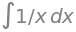

In [40]:
sp.Integral(1/x,x)

In [110]:
sp.integrate(sp.sin(x**2), (x, -sp.oo, sp.oo)) # double o is infinity

In [65]:
sp.oo

In [42]:
sp.expand(x*z)

In [43]:
sp.factor(x**2+2*x+1)

In [51]:
sp.factor(x**3+3*x*x+3*x+1)

In [96]:
sp.collect(x*y + x - 3 + 2*x**2 - z*x**2 + x**3,x)

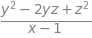

In [97]:
sp.cancel((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

Taylor expansion:

In [49]:
h = sp.symbols('h')
sp.sin(x).series(x, x0=h, n=5)

In [50]:
sp.sin(x).series(x, x0=0, n=5)

Simplification of expressions:

In [60]:
expr=sp.simplify(x*sp.sin(x)*(1/x+2))
expr

In [92]:
sp.simplify(sp.sin(x)**2 + sp.cos(x)**2)

In [94]:
sp.simplify(sp.sin(x)**4 - 2*sp.cos(x)**2*sp.sin(x)**2 + sp.cos(x)**4)

Derivatives:

In [61]:
sp.diff(expr, x)

Solving equations:

In [66]:
sp.solve(x**2 - 2, x)

Solving differential equations:

In [67]:
y = sp.Function('y')
t=sp.symbols('t')
sp.dsolve(sp.Eq(y(t).diff(t, t) - y(t), sp.exp(t)), y(t))

Evaluating the expressions:
be very careful with trying to change values of what you set as symbols. Python won't complain, but the result might be surprising

In [81]:
x = sp.symbols('x')
expr = x + 1
print(expr)
#x = 1 #uncomment this to get nonsence int he next line
print(x)
print(expr)

x + 1
x
x + 1


In [79]:
expr.subs(x,7)

In [85]:
x,y,z= sp.symbols('x y z')
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

But if you need too many numerics, pure sympy is slow, you can call numpy from it:

In [90]:
import numpy 
a = numpy.arange(10) 
expr = x*x
f = sp.lambdify(x, expr, "numpy") 
f(a) 

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

You can also create expressions from strings:

In [88]:
str_expr = "x**3 + 7*x - 3/22"
expr = sp.sympify(str_expr)
expr

### **Decorators**

Decorators are functions used to modify other functions, that is allowing the user to add new functionality to an existing object without modifying its structure. 

Let's start from an example of function that has another function as an argument:

In [5]:
def change_sign(f,x):
    return -f(x)

def my_f(x):
    return 7*x

x=3
print(change_sign(my_f,x))

-21


What if the we have more than one argument?

In [6]:
def change_sign(f,*args, **kwargs): #kwargs stands for keyword arguments
    return -f(*args, **kwargs)

def product(x,y):
    return x*y

y=4

print(change_sign(my_f,x))
print(change_sign(product,x,y))

-21
-12


This is a bit ugly though. Let's make the `change_sign` function return a function rather than the output. To do this, we need to create another, wrapping function inside `change_sign`.

In [7]:
def change_sign(f):
    def wrapper(*args, **kwargs):
        return -f(*args, **kwargs)
    return wrapper

minus_my_f = change_sign(my_f)

print(minus_my_f(x))


-21


Now we have a function that will modify any function to output the opposite sign value. However, we probably woudln't want to have to redefine all the functions we might need to use the change sign on. That's where decorator syntax comes in:

In [9]:
def change_sign(func):
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    return 7*x

@change_sign
def product(x,y):
    return x*y

print(my_f(x))
print(product(x,y))


-21
-12


The only problem we have now concerns the help:

In [10]:
help(my_f)
help(product)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)



We can fix this by using a decorator from the functools package

In [11]:
import functools

def change_sign(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    return 7*x

@change_sign
def product(x,y):
    return x*y

help(my_f)
help(product)


Help on function my_f in module __main__:

my_f(x)

Help on function product in module __main__:

product(x, y)



Here is one very useful example of the use of the decorators:

In [12]:
debug_flag = True

def debug(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if debug_flag:
            arguments = [f"{a}" for a in args]
            karguments = [f"{k}={v}" for k,v in kwargs.items()]
            name = func.__name__
            print("Calling "+name+" with args: "+", ".join(arguments)+" and kwargs: "+", ".join(karguments))
            value = func(*args, **kwargs)
            print("Run function: "+name+", which output: "+repr(value))
            return value
        else:
            return func(*args, **kwargs)
    return wrapper

@debug
def my_f(x):
    return 7*x

print(my_f(2))

Calling my_f with args: 2 and kwargs: 
Run function: my_f, which output: 14
14


### **More about classes:**

We can use decorators with classes, not just with functions. There are some inbuilt ones that are especially helpful. Let's say we want to make our class members constant:

In [22]:
class coords:
    def __init__(self, x, y):
        self._x = x
        self._y = y

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y


p = coords(3, 4)

print(p.x, p.y)

3 4


In [23]:
p.x=0

AttributeError: can't set attribute

In [19]:
p._x=0
print(p.x,p.y)

0 4


In [24]:
help(property)

Help on class property in module builtins:

class property(object)
 |  property(fget=None, fset=None, fdel=None, doc=None) -> property attribute
 |  
 |  fget is a function to be used for getting an attribute value, and likewise
 |  fset is a function for setting, and fdel a function for del'ing, an
 |  attribute.  Typical use is to define a managed attribute x:
 |  
 |  class C(object):
 |      def getx(self): return self._x
 |      def setx(self, value): self._x = value
 |      def delx(self): del self._x
 |      x = property(getx, setx, delx, "I'm the 'x' property.")
 |  
 |  Decorators make defining new properties or modifying existing ones easy:
 |  
 |  class C(object):
 |      @property
 |      def x(self):
 |          "I am the 'x' property."
 |          return self._x
 |      @x.setter
 |      def x(self, value):
 |          self._x = value
 |      @x.deleter
 |      def x(self):
 |          del self._x
 |  
 |  Methods defined here:
 |  
 |  __delete__(self, instance, /)
 |  

Python doesn't really have private/public access modifiers like c++, but the API behaviour can be imitated (we need it to separate API from the implementation, not for security in this case)

In [26]:
class coords:
    def __init__(self, x, y):
        self._x = x
        self._y = y

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y

    @x.setter
    def x(self, value):
        self._x = value

p = coords(3, 4)

print(p.x, p.y)

3 4


In [28]:
p._x=0